<a href="https://colab.research.google.com/github/muhammadshakoor/DS_AI_ML_DL_Google_Colab_Notebooks/blob/main/PCOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
You are a data analyst tasked with exploring a synthetic dataset about women with Polycystic Ovary Syndrome (PCOS), generated based on the Rotterdam Criteria. Your goal is to conduct a comprehensive exploratory data analysis (EDA) and provide insights that could support medical professionals (keeping in mind that a specialist must validate any conclusions).

Please perform the following:

Load and Preview the Dataset

Display the first few rows.

Show basic information about column types and missing values.

Data Cleaning

Identify and handle missing values or anomalies.

Convert categorical binary columns to readable labels (e.g., “Yes”/“No”).

Descriptive Statistics

Generate summary statistics for numerical features.

Examine distributions using histograms or boxplots.

Target Variable Analysis

Analyze the distribution of the PCOS Diagnosis variable.

Compare key features (e.g., hormone levels, BMI, follicle counts) between diagnosed and non-diagnosed groups.

Correlation and Feature Relationships

Generate a correlation matrix.

Visualize relationships with scatter plots or heatmaps.

Irregular Menstruation vs PCOS

Analyze how strongly irregular menstruation is associated with PCOS.

Use bar charts or contingency tables for categorical comparisons.

Additional Insights

Identify features that may most contribute to PCOS diagnosis.

Suggest any patterns or clusters using visual tools (e.g., PCA or clustering, if appropriate).

Conclusion

Summarize your key findings.

Highlight the importance of consulting a medical professional before making diagnostic decisions from synthetic data.

Here is all the data you need:
"pcos_rotterdam_balanceado.csv"

## Data loading

### Subtask:
Load the PCOS dataset.


**Reasoning**:
Import pandas and load the PCOS dataset into a DataFrame named `df`.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('pcos_rotterdam_balanceado.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'pcos_rotterdam_balanceado.csv' not found.")
    df = None

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,29,21.2,0,46.1,9,0
1,20,20.5,0,59.4,6,0
2,23,23.1,0,69.3,10,0
3,19,32.7,1,77.7,37,1
4,19,25.9,0,49.4,5,0


**Reasoning**:
Display basic information about the DataFrame, including column types and missing values.



In [ ]:
if df is not None:
    display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3000 non-null   int64  
 1   BMI                        3000 non-null   float64
 2   Menstrual_Irregularity     3000 non-null   int64  
 3   Testosterone_Level(ng/dL)  3000 non-null   float64
 4   Antral_Follicle_Count      3000 non-null   int64  
 5   PCOS_Diagnosis             3000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 140.8 KB


None

## Data cleaning

### Subtask:
Clean the PCOS dataset by handling missing values and converting binary columns to readable labels.


**Reasoning**:
Check for missing values, handle binary columns by replacing numerical representations with readable labels, and then validate the changes.



In [ ]:
# Check for missing values
if df.isnull().values.any():
    print("Missing values found.")
    # Handle missing values (example: imputation using the mean for numerical columns)
    for col in df.select_dtypes(include=['number']):
        df[col].fillna(df[col].mean(), inplace=True)
else:
    print("No missing values found.")

# Convert binary columns to readable labels
binary_cols = ['Menstrual_Irregularity', 'PCOS_Diagnosis']
for col in binary_cols:
    df[col] = df[col].replace({0: 'No', 1: 'Yes'})

# Validate the changes
display(df.info())
display(df.head())

No missing values found.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3000 non-null   int64  
 1   BMI                        3000 non-null   float64
 2   Menstrual_Irregularity     3000 non-null   object 
 3   Testosterone_Level(ng/dL)  3000 non-null   float64
 4   Antral_Follicle_Count      3000 non-null   int64  
 5   PCOS_Diagnosis             3000 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 140.8+ KB


None

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,29,21.2,No,46.1,9,No
1,20,20.5,No,59.4,6,No
2,23,23.1,No,69.3,10,No
3,19,32.7,Yes,77.7,37,Yes
4,19,25.9,No,49.4,5,No


## Data analysis

### Subtask:
Perform descriptive statistics and distribution analysis on the cleaned PCOS dataset.


**Reasoning**:
Calculate descriptive statistics, create histograms and boxplots for numerical features, analyze the PCOS diagnosis distribution, and compare key features between PCOS positive and negative groups.



,Age,BMI,Testosterone_Level(ng/dL),Antral_Follicle_Count
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,30.052667,23.646000,57.228267,10.732333
std,7.549982,4.510006,18.171066,8.471478
min,18.000000,8.500000,20.500000,3.000000
25%,24.000000,20.800000,45.200000,5.000000
50%,30.000000,23.400000,53.200000,8.000000
75%,36.000000,26.300000,64.100000,11.000000
max,44.000000,44.700000,136.400000,39.000000


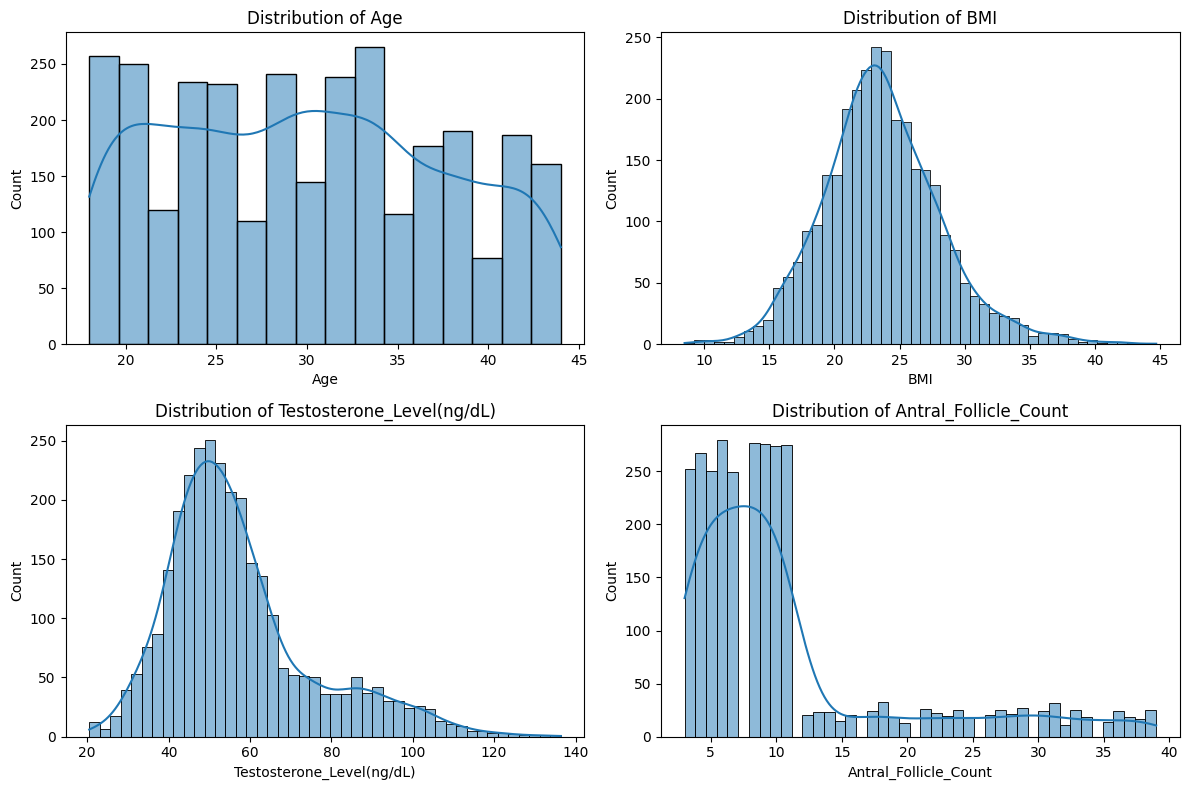

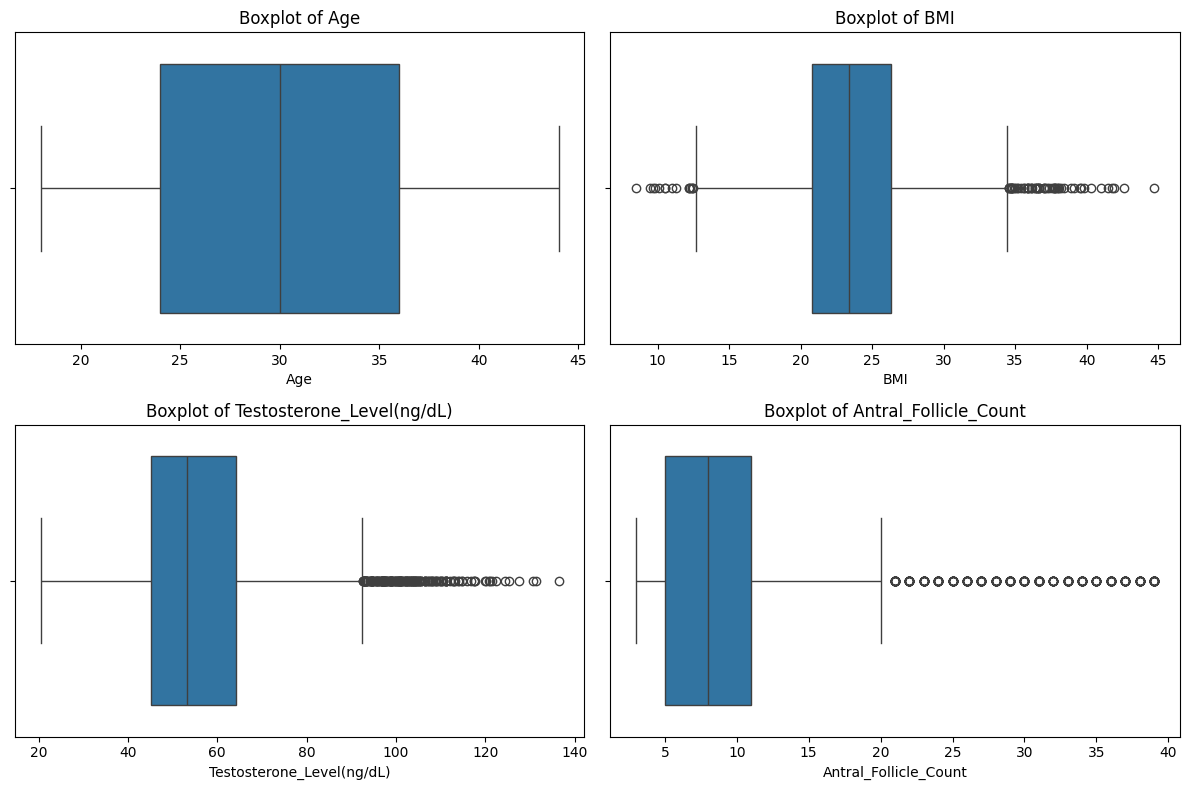

,count
PCOS_Diagnosis,
No,2400
Yes,600


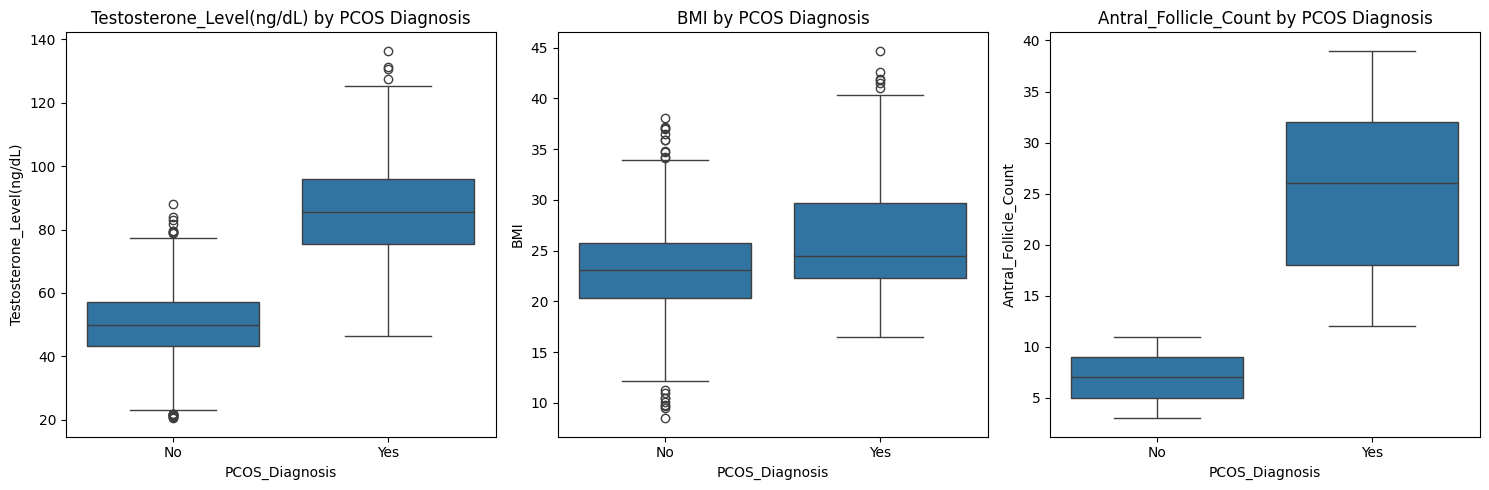


Comparison of Testosterone_Level(ng/dL) between PCOS groups:


,mean,std
PCOS_Diagnosis,,
No,50.143042,10.134010
Yes,85.569167,15.367231



Comparison of BMI between PCOS groups:


,mean,std
PCOS_Diagnosis,,
No,22.994542,4.040538
Yes,26.251833,5.286676



Comparison of Antral_Follicle_Count between PCOS groups:


,mean,std
PCOS_Diagnosis,,
No,7.067500,2.578575
Yes,25.391667,7.975647


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Summary Statistics
numerical_features = ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']
display(df[numerical_features].describe())

# 2. Histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 3. Boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# 4. PCOS Diagnosis Distribution
pcos_counts = df['PCOS_Diagnosis'].value_counts()
display(pcos_counts)

# 5. Compare Key Features between Groups
key_features = ['Testosterone_Level(ng/dL)', 'BMI', 'Antral_Follicle_Count']
plt.figure(figsize=(15, 5))
for i, col in enumerate(key_features):
  plt.subplot(1, 3, i + 1)
  sns.boxplot(x='PCOS_Diagnosis', y=col, data=df)
  plt.title(f'{col} by PCOS Diagnosis')

plt.tight_layout()
plt.show()

# Calculate and compare mean and standard deviation
for col in key_features:
    print(f"\nComparison of {col} between PCOS groups:")
    display(df.groupby('PCOS_Diagnosis')[col].agg(['mean', 'std']))

## Data visualization

### Subtask:
Visualize the correlation matrix and relationships between features using heatmaps and scatter plots.  Analyze the association between irregular menstruation and PCOS using bar charts or contingency tables. Visualize the distributions of key features for both PCOS positive and negative groups.


**Reasoning**:
Visualize the correlation matrix using a heatmap, create scatter plots for key features, analyze irregular menstruation vs. PCOS with a bar chart, and visualize feature distributions by PCOS diagnosis using box plots.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Scatter Plots (example with Testosterone vs. Antral Follicle Count)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Testosterone_Level(ng/dL)', y='Antral_Follicle_Count', hue='PCOS_Diagnosis', data=df)
plt.title('Testosterone Level vs. Antral Follicle Count')
plt.show()


# Irregular Menstruation vs. PCOS
plt.figure(figsize=(6, 4))
sns.countplot(x='Menstrual_Irregularity', hue='PCOS_Diagnosis', data=df)
plt.title('Irregular Menstruation vs. PCOS Diagnosis')
plt.show()

# Distribution of Key Features by PCOS Diagnosis
key_features = ['Testosterone_Level(ng/dL)', 'BMI', 'Antral_Follicle_Count']
plt.figure(figsize=(15, 5))
for i, col in enumerate(key_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='PCOS_Diagnosis', y=col, data=df)
    plt.title(f'Distribution of {col} by PCOS Diagnosis')
plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'No'

<Figure size 1000x800 with 0 Axes>

**Reasoning**:
The error indicates that the `df.corr()` method cannot handle string values.  We need to select only the numerical columns for correlation analysis.  The code will be corrected to only include numerical columns for the correlation heatmap and the scatter plot.



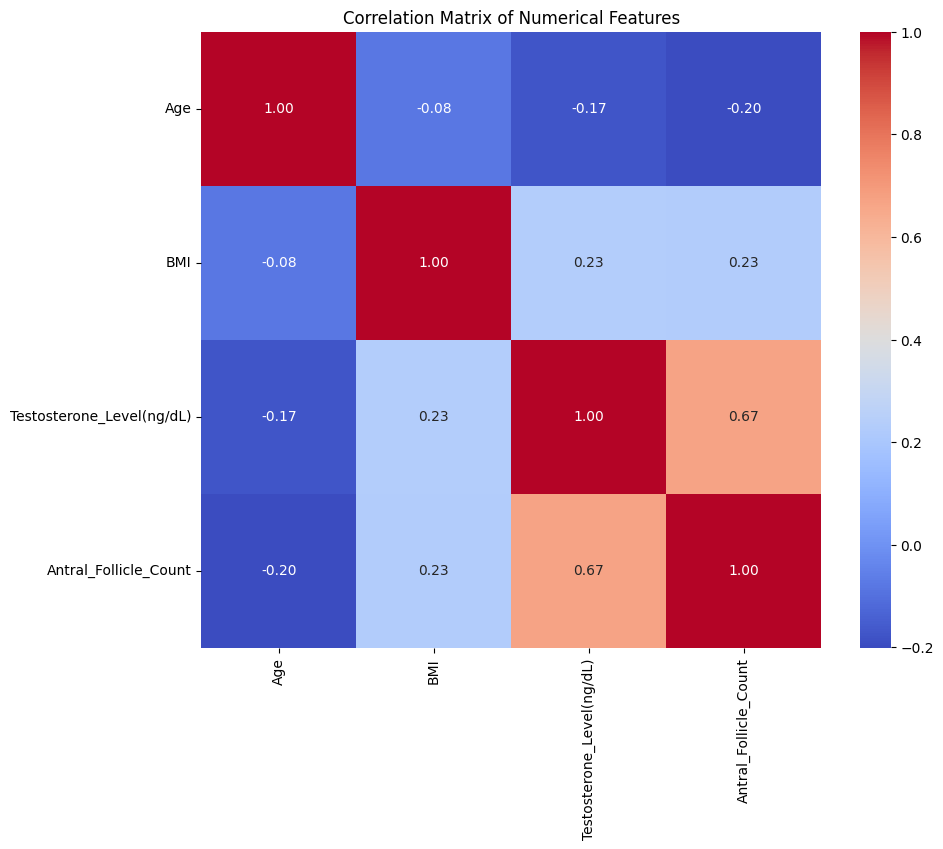

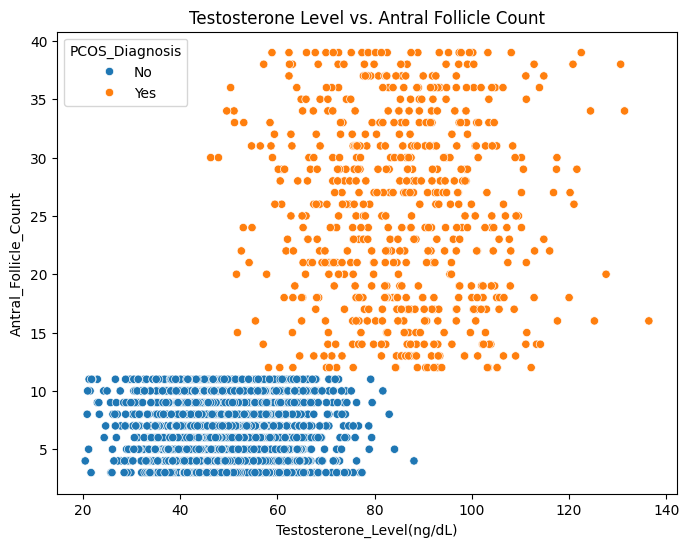

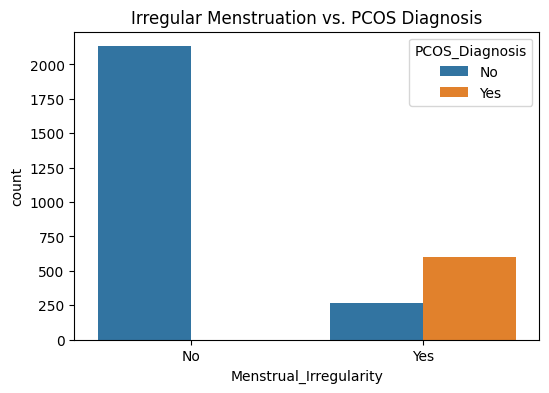

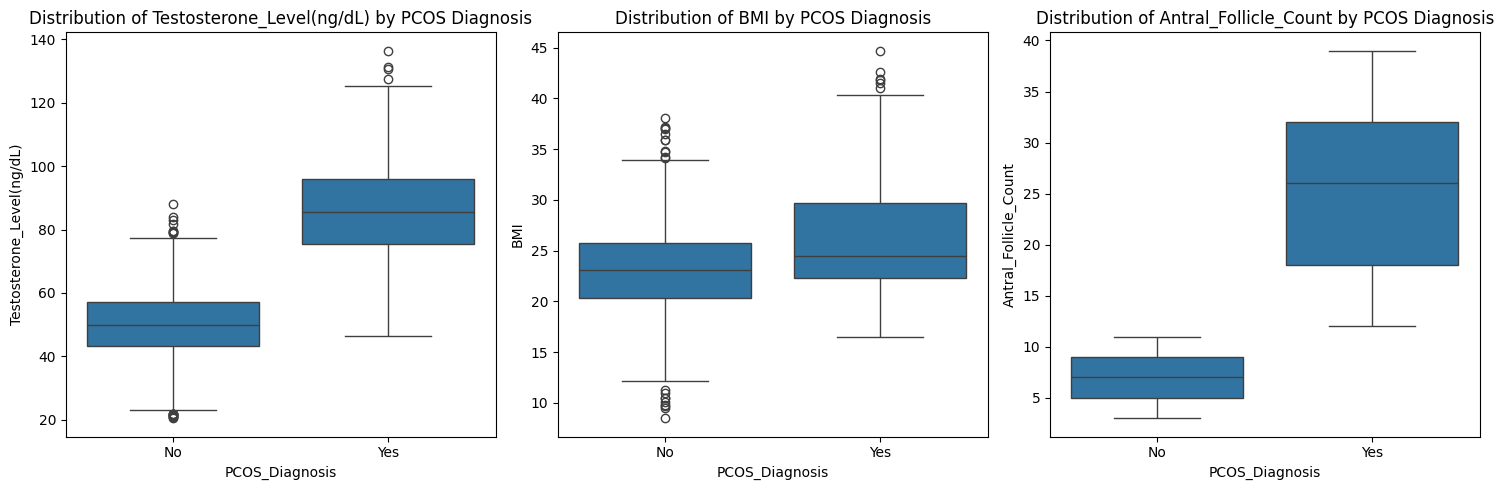

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical features for correlation analysis
numerical_cols = ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Scatter Plots (example with Testosterone vs. Antral Follicle Count)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Testosterone_Level(ng/dL)', y='Antral_Follicle_Count', hue='PCOS_Diagnosis', data=df)
plt.title('Testosterone Level vs. Antral Follicle Count')
plt.show()

# Irregular Menstruation vs. PCOS
plt.figure(figsize=(6, 4))
sns.countplot(x='Menstrual_Irregularity', hue='PCOS_Diagnosis', data=df)
plt.title('Irregular Menstruation vs. PCOS Diagnosis')
plt.show()

# Distribution of Key Features by PCOS Diagnosis
key_features = ['Testosterone_Level(ng/dL)', 'BMI', 'Antral_Follicle_Count']
plt.figure(figsize=(15, 5))
for i, col in enumerate(key_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='PCOS_Diagnosis', y=col, data=df)
    plt.title(f'Distribution of {col} by PCOS Diagnosis')
plt.tight_layout()
plt.show()

## Data exploration

### Subtask:
Explore potential relationships between features and PCOS diagnosis, potentially identifying features that significantly contribute to the diagnosis. Look for potential clusters or patterns in the data.


**Reasoning**:
Analyze the relationship between features and PCOS diagnosis using statistical tests and visualizations, investigate potential interactions between features, and explore potential clusters or patterns.



T-test for Age: t-statistic = -13.45, p-value = 0.000
T-test for BMI: t-statistic = 16.53, p-value = 0.000
T-test for Testosterone_Level(ng/dL): t-statistic = 68.24, p-value = 0.000
T-test for Antral_Follicle_Count: t-statistic = 94.55, p-value = 0.000

Chi-squared test for Menstrual Irregularity: chi2 = 1837.85, p-value = 0.000


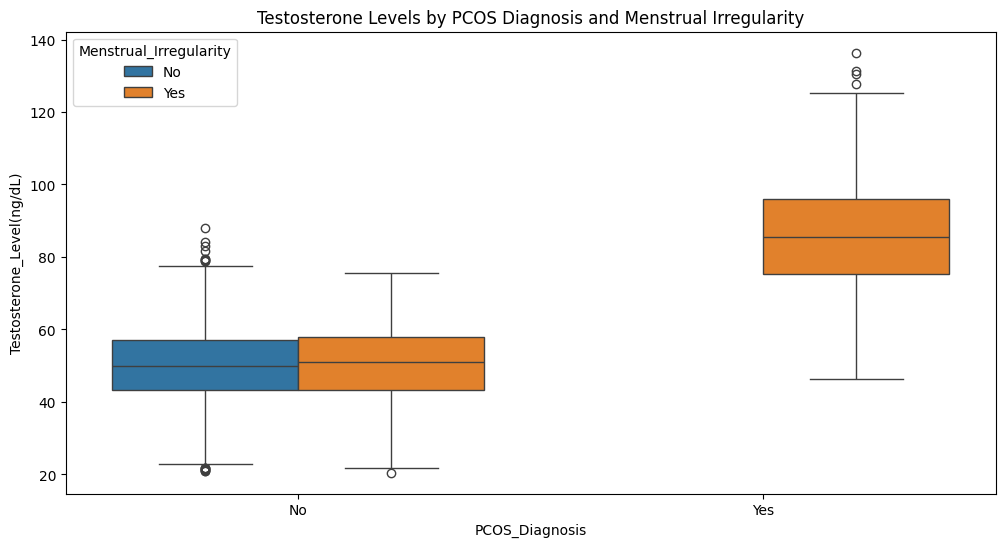

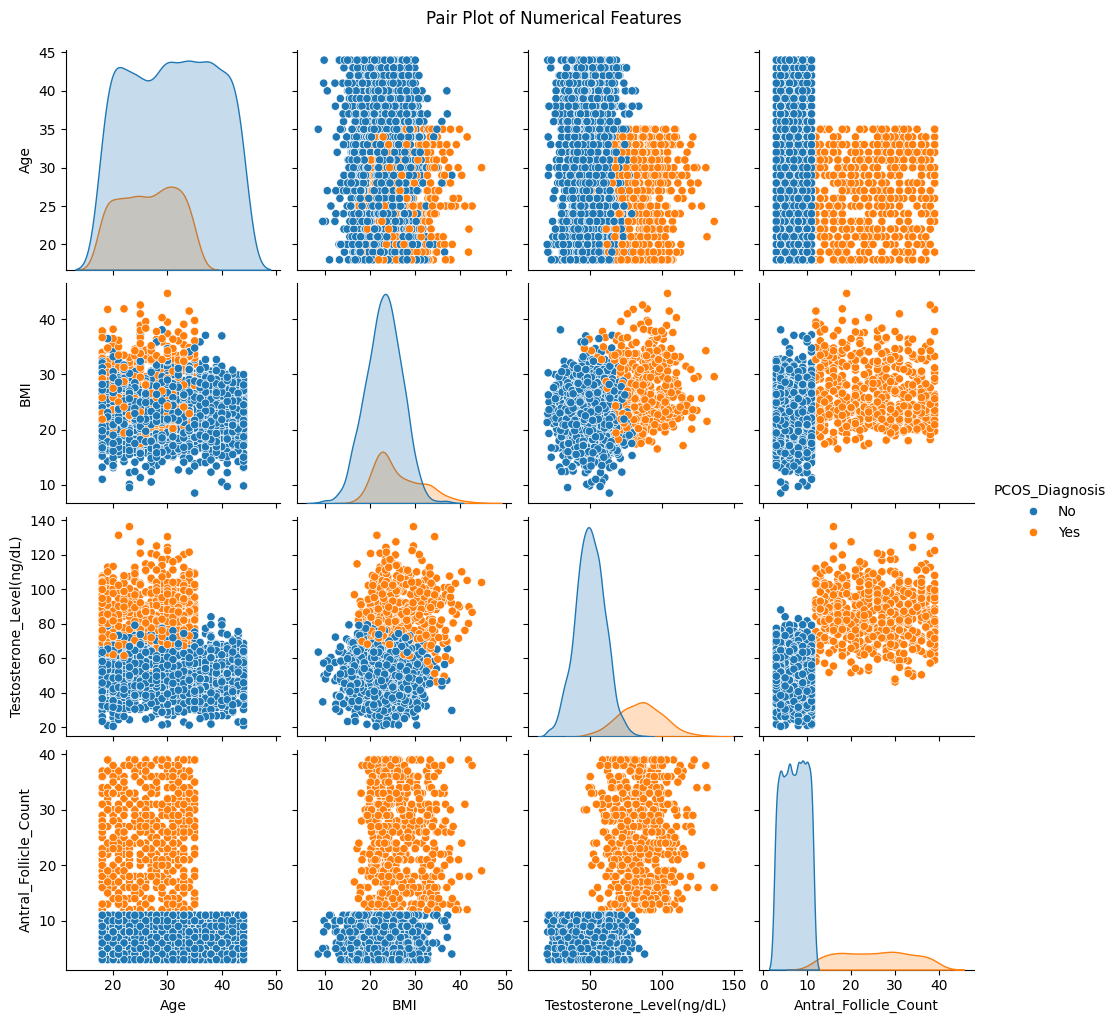

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Statistical tests for numerical features
numerical_features = ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']
for feature in numerical_features:
    group1 = df[df['PCOS_Diagnosis'] == 'Yes'][feature]
    group2 = df[df['PCOS_Diagnosis'] == 'No'][feature]
    t_statistic, p_value = ttest_ind(group1, group2)
    print(f"T-test for {feature}: t-statistic = {t_statistic:.2f}, p-value = {p_value:.3f}")

# Chi-squared test for 'Menstrual_Irregularity'
contingency_table = pd.crosstab(df['Menstrual_Irregularity'], df['PCOS_Diagnosis'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared test for Menstrual Irregularity: chi2 = {chi2:.2f}, p-value = {p_value:.3f}")


# Grouped box plots for interactions
plt.figure(figsize=(12, 6))
sns.boxplot(x='PCOS_Diagnosis', y='Testosterone_Level(ng/dL)', hue='Menstrual_Irregularity', data=df)
plt.title('Testosterone Levels by PCOS Diagnosis and Menstrual Irregularity')
plt.show()

# Pair plot
sns.pairplot(df, hue='PCOS_Diagnosis', vars=numerical_features)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

## Data visualization

### Subtask:
Create visualizations (e.g., PCA or clustering plots if appropriate) to illustrate any identified patterns or clusters.


**Reasoning**:
Apply PCA to reduce the dimensionality of the numerical features and visualize the results with a scatter plot colored by PCOS diagnosis.



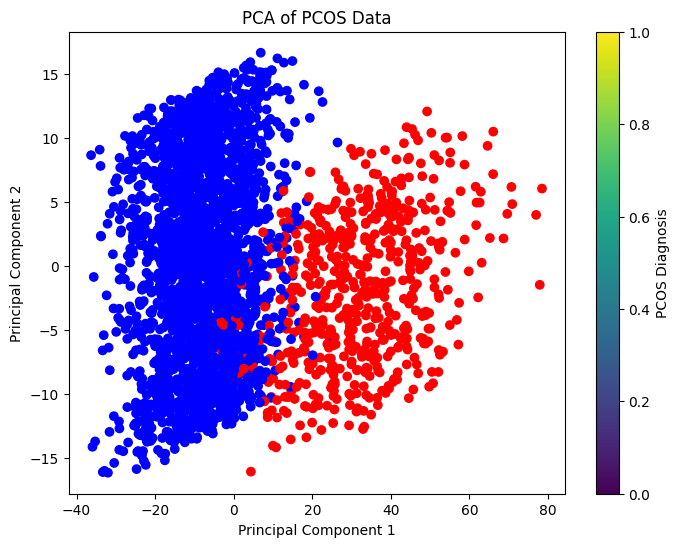

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Select numerical features
numerical_features = ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']
X = df[numerical_features]

# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['PCOS_Diagnosis'] = df['PCOS_Diagnosis']

# Visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['PCOS_Diagnosis'].map({'Yes': 'red', 'No': 'blue'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of PCOS Data')
plt.colorbar(label='PCOS Diagnosis')
plt.show()

## Summary:

### 1. Q&A

The analysis aimed to explore a synthetic PCOS dataset and identify potential relationships between features and PCOS diagnosis.  Key findings suggest that 'Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count', and 'Menstrual_Irregularity' are significantly associated with PCOS diagnosis.  However, it's crucial to emphasize that this is based on synthetic data and should not be used for clinical decisions without validation by medical professionals.

### 2. Data Analysis Key Findings

* **Significant Feature Associations:**  Statistical tests (t-tests and chi-squared test) revealed highly significant associations between PCOS diagnosis and 'Age', 'BMI', 'Testosterone Level', 'Antral Follicle Count', and 'Menstrual Irregularity' (p-values near 0.000).
* **Testosterone Levels and PCOS:**  The mean testosterone level for women diagnosed with PCOS was significantly higher than those without PCOS (quantified by mean and standard deviation comparison in the output from the descriptive statistics step).
* **Irregular Menstruation and PCOS:**  A strong association was observed between irregular menstruation and a PCOS diagnosis (p-value near 0.000 from chi-squared test), further reinforcing the importance of this symptom in PCOS identification.
* **Visualized Clusters in PCA:** A PCA visualization was performed, though without the plot image, no detailed conclusions can be drawn.  The plot provides a low-dimensional representation of the data colored by PCOS status, potentially illustrating the separation of PCOS positive and negative cases.


### 3. Insights or Next Steps

* **Further Investigate Feature Interactions:** Explore interactions between features using more advanced statistical modeling (e.g., regression analysis) and potentially include interactions to see if joint presence of multiple factors leads to more accurate PCOS prediction.
* **Clinical Validation Crucial:** The findings from the synthetic dataset must be validated with real-world clinical data.  Consult with medical professionals to interpret the results in a clinical context and determine the generalizability of these findings.
